## Image Similarity
The ability of an image similarity model to find identical images with the utmost accuracy in defined data sets is helping in many ways. Finding plagiarized photos, identifying fake accounts, discovering original images of people, products, and places are a few of the image similarity real-world applications.

There are many metrics out there for evaluating whether two images look like or how much they appear. Generally, the question is said to human's perception of images, so each
algorithm has its support on human sensory system traits. Among them, SSIM is the easiest method to calculate and its overhead is additionally small. The (structural similarity index metric) SSIM is an algorithm which we will be used for predicting the difference between two images. 
SSIM is mainly used for measuring the similarity between two images. The SSIM index is a full reference metric. i.e., the measurement or prediction of image quality is predicated on an initial uncompressed or distortion-free image as a reference. SSIM is used to enhance traditional methods of mean squared error (MSE) and peak signal to noise (PSNR).
Let's define what is calculating. MSE will calculate the mean square error between each pixel for the 2 images we are comparing. Whereas SSIM will do the other and appearance for
similarities within pixels; i.e. if the pixels within the two images line up and or have similar pixel density values. the sole issues are that MSE tends to possess arbitrarily high numbers so it's harder to standardize it. The more the MSE value the images differ from each other, if the MSE value between images differs appears randomly, it'll be difficult for us to inform anything. SSIM on the opposite hand puts everything on a scale of -1 to 1. A score of 1 meant they're very similar and a score of -1 meant they're very different. In my opinion, this is often a far better metric of measurement. 
Ref

In [33]:
#SSIM - > Structral Similer Index Measure - we will gain this from scikit-learn
from skimage.metrics import structural_similarity as ssim # use it to same visible structured pattern same
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def meanSquaredError(image01, image02):
    error = np.sum((image01.astype("float") - image02.astype("float")) ** 2)
    error = error / float(image01.shape[0] * image02.shape[1])
    return error

In [3]:
def imageComparison(image01, image02):
    applyMeanSquaredError = meanSquaredError(image01, image02)
    applySSIM = ssim(image01, image02)
    print("Mean Squared Error is {}\nStructural Similarity Index Measure is: {}".format(applyMeanSquaredError, applySSIM))

In [4]:
image01 = cv.imread("../input/pandaimage/panda.jpg")
image02 = cv.imread("../input/pandaimage2/Panda.jpg")
image03 = cv.imread("../input/catimg/CatImage.jpg")

In [5]:
image01 = cv.cvtColor(image01, cv.COLOR_BGR2GRAY)
image02 = cv.cvtColor(image02, cv.COLOR_BGR2GRAY)
image03 = cv.cvtColor(image03, cv.COLOR_BGR2GRAY)

In [6]:
imageComparison(image01, image02)

Mean Squared Error is 0.0
Structural Similarity Index Measure is: 1.0


Rotate image

In [11]:
image02.shape

(1688, 3000)

In [10]:
image02.shape[1::-1]

(3000, 1688)

In [13]:
image02.shape[1::-1] / 2 #got error

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [17]:
np.array(image02.shape[1::-1]) / 2

array([1500.,  844.])

this is how we got tuple

In [18]:
tuple(np.array(image02.shape[1::-1]) / 2)

(1500.0, 844.0)

### this code rotates an input image by 10 degrees around its center point using an affine transformation with bilinear interpolation.
imageWrap = cv.warpAffine(image02, imageRotation, image02.shape[1::-1], flags = cv.INTER_LINEAR): This line applies the affine transformation to the image using the warpAffine function. The first parameter is the input image, the second parameter is the transformation matrix, the third parameter is the size of the output image (width and height), and the fourth parameter is the interpolation method used for the transformation. In this case, cv.INTER_LINEAR is used, which represents bilinear interpolation, a method that takes a weighted average of the four nearest pixels to calculate the output pixel value.

In [21]:
imageAngle = 10
imageCenter = tuple(np.array(image02.shape[1::-1])/2)
imageRotation = cv.getRotationMatrix2D(imageCenter, imageAngle, 1.0)
imageWarp = cv.warpAffine(image02, imageRotation, image02.shape[1::-1],
                          flags = cv.INTER_LINEAR)#bi-linear relationship, we used Inter_Linear

In [25]:
imageWarp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Save Imgae

In [27]:
cv.imwrite("../working/AugmentedImage.jpg", imageWarp)

True

In [31]:
image = cv.imread("../working/AugmentedImage.jpg")

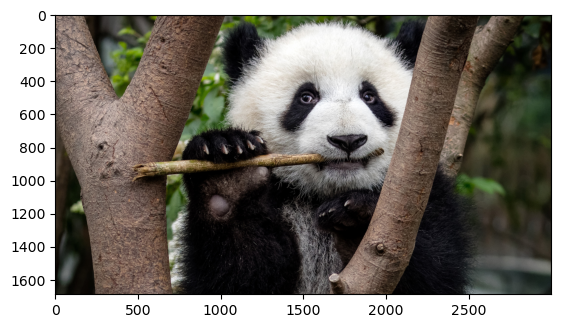

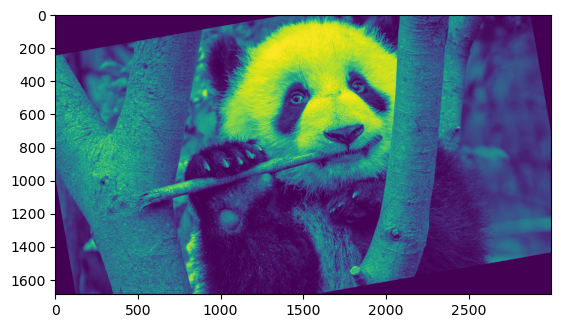

In [38]:
image = plt.imread("../working/AugmentedImage.jpg")
image2 = plt.imread("../input/pandaimage2/Panda.jpg")
plt.imshow(image2)
plt.show()
plt.imshow(image)
plt.show()


In [44]:
image = cv.imread("../working/AugmentedImage.jpg")
image2 = cv.imread("../input/pandaimage2/Panda.jpg")
image01 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image02 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
imageComparison(image01, image02)

Mean Squared Error is 3288.3312509873617
Structural Similarity Index Measure is: 0.19410868657221972


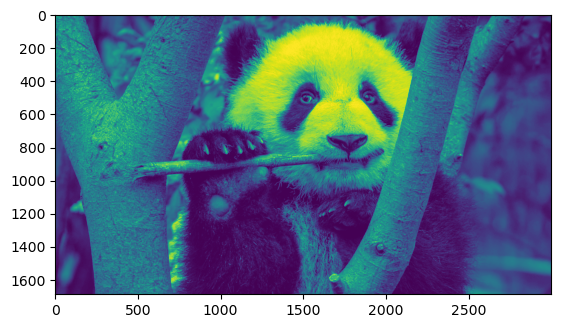

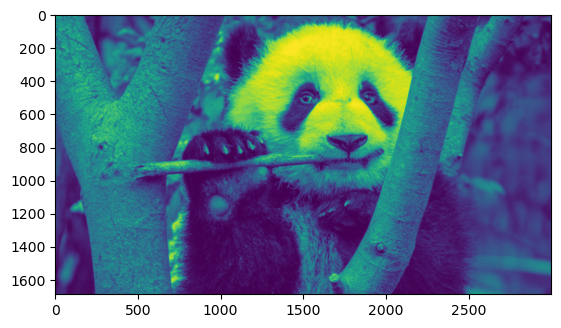

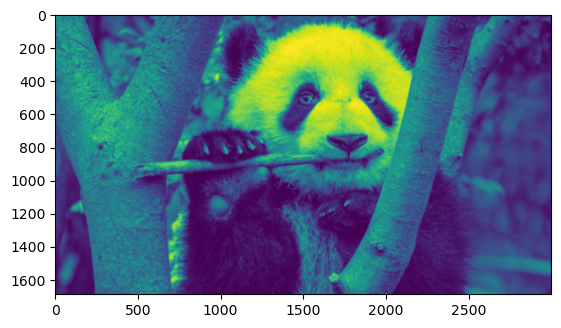

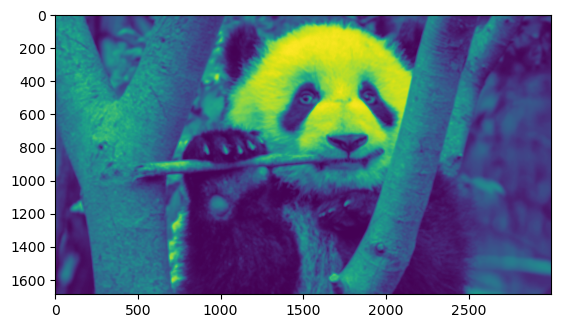

In [48]:
image01 = cv.blur(image02, (3, 3))
image012 = cv.blur(image02, (7, 7))
image013 = cv.blur(image02, (9, 9))
image014 = cv.blur(image02, (15, 15))

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()

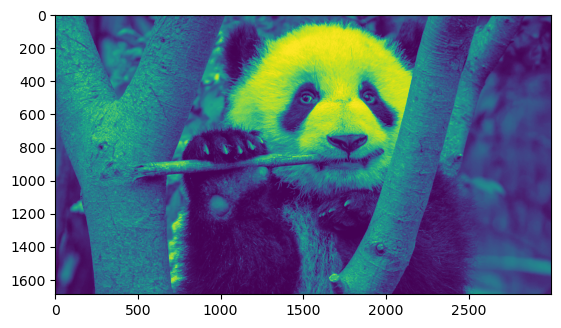

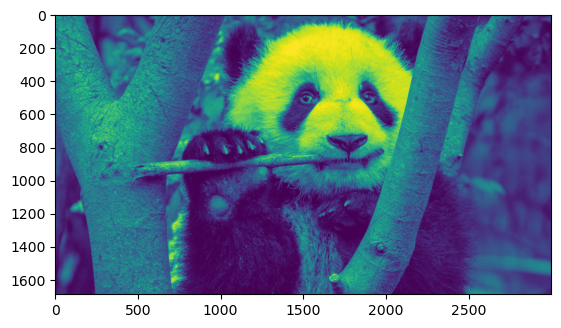

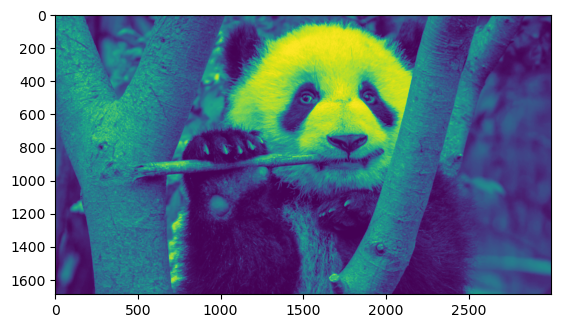

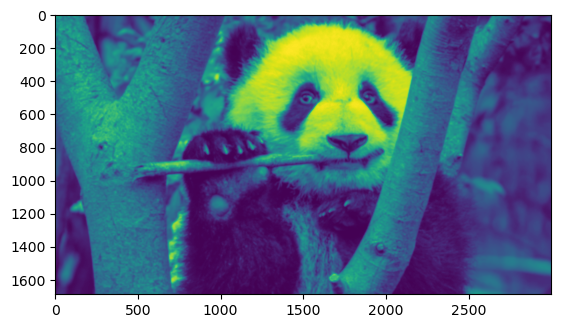

In [54]:
image01 = cv.GaussianBlur(image02, (3, 3), 0)
image012 = cv.GaussianBlur(image02, (7, 7), 0)
image013 = cv.GaussianBlur(image02, (9, 9), 0)
image014 = cv.GaussianBlur(image02, (23, 23), 0)

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()

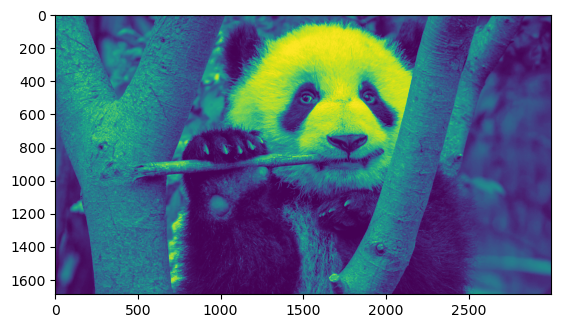

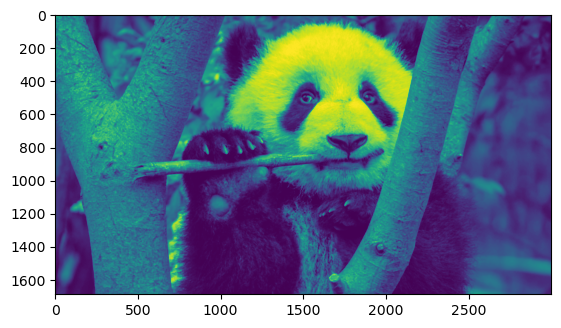

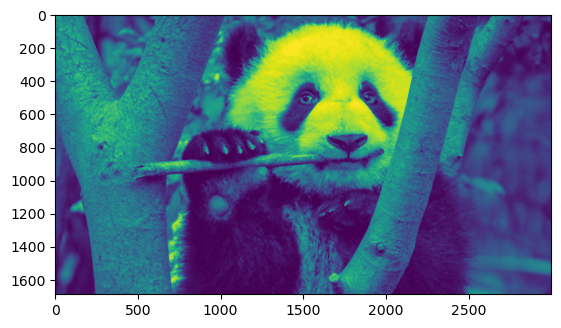

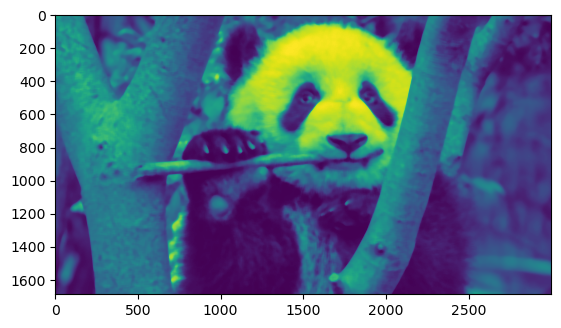

In [53]:
image01 = cv.medianBlur(image02, 3)
image012 = cv.medianBlur(image02, 7)
image013 = cv.medianBlur(image02, 9)
image014 = cv.medianBlur(image02, 23)

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()

 In this case, cv.INTER_NEAREST is used, which represents nearest-neighbor interpolation. This method simply takes the value of the nearest pixel to the output pixel position to calculate its value.
Nearest-neighbor interpolation is much faster than bilinear interpolation but it can result in a loss of quality or a "blocky" appearance in the output image, especially if the rotation angle is large or the image has a low resolution. Therefore, it's a trade-off between speed and quality.

In [56]:
imageAngle = 10
imageCenter = tuple(np.array(image02.shape[1::-1])/2)
imageRotation = cv.getRotationMatrix2D(imageCenter, imageAngle, 1.0)
imageWarp = cv.warpAffine(image02, imageRotation, image02.shape[1::-1],
                          flags = cv.INTER_NEAREST)

In [58]:
cv.imwrite("../working/AugmentedImage01.jpg", imageWarp)

True

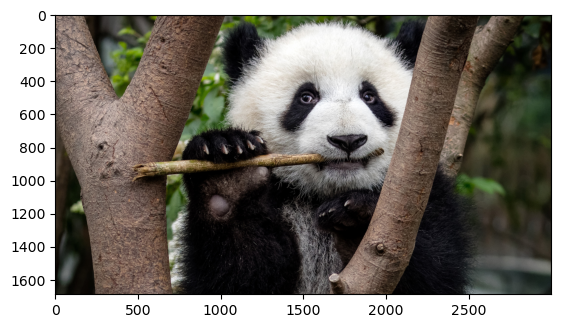

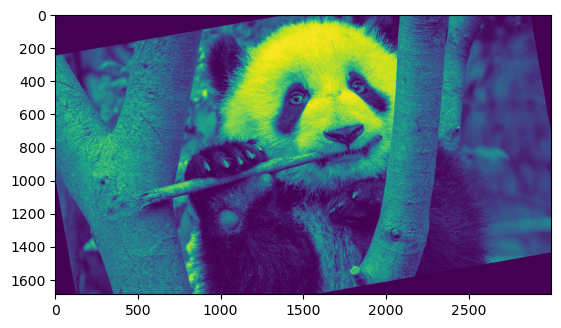

In [59]:
image = plt.imread("../working/AugmentedImage01.jpg")
image2 = plt.imread("../input/pandaimage2/Panda.jpg")
plt.imshow(image2)
plt.show()
plt.imshow(image)
plt.show()


In [60]:
image = cv.imread("../working/AugmentedImage01.jpg")
image2 = cv.imread("../input/pandaimage2/Panda.jpg")
image01 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image02 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
imageComparison(image01, image02)

Mean Squared Error is 3381.9898923775672
Structural Similarity Index Measure is: 0.17776637206376908


In this case, cv.INTER_AREA is used, which represents pixel area interpolation. This method resamples the image using pixel area relation. It may be the best method when you need to reduce the size of an image, as it tends to produce less aliasing artifacts.
Pixel area interpolation can be used to scale an image up or down with better quality than nearest-neighbor interpolation but it is slower than nearest-neighbor interpolation. It may be a good choice if you need to reduce the size of an image with minimal distortion.

In [61]:
imageAngle = 10
imageCenter = tuple(np.array(image02.shape[1::-1])/2)
imageRotation = cv.getRotationMatrix2D(imageCenter, imageAngle, 1.0)
imageWarp = cv.warpAffine(image02, imageRotation, image02.shape[1::-1],
                          flags = cv.INTER_AREA)

In [62]:
cv.imwrite("../working/AugmentedImage02.jpg", imageWarp)

True

In [63]:
image = cv.imread("../working/AugmentedImage02.jpg")
image2 = cv.imread("../input/pandaimage2/Panda.jpg")
image01 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image02 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
imageComparison(image01, image02)

Mean Squared Error is 3288.3312509873617
Structural Similarity Index Measure is: 0.19410868657221972


In this case, cv.INTER_CUBIC is used, which represents bicubic interpolation. This method takes into account a larger neighborhood of pixels around the output pixel and uses a cubic polynomial to estimate the output pixel value.

Bicubic interpolation produces better quality than bilinear interpolation but it is slower. It may be a good choice if you need to rotate an image with minimal distortion and higher quality than bilinear interpolation.

In [64]:
imageAngle = 10
imageCenter = tuple(np.array(image02.shape[1::-1])/2)
imageRotation = cv.getRotationMatrix2D(imageCenter, imageAngle, 1.0)
imageWarp = cv.warpAffine(image02, imageRotation, image02.shape[1::-1],
                          flags = cv.INTER_CUBIC)

In [65]:
cv.imwrite("../working/AugmentedImage03.jpg", imageWarp)

True

In [66]:
image = cv.imread("../working/AugmentedImage03.jpg")
image2 = cv.imread("../input/pandaimage2/Panda.jpg")
image01 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image02 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
imageComparison(image01, image02)

Mean Squared Error is 3371.1566380331756
Structural Similarity Index Measure is: 0.18066048604266685
